In [51]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import seaborn as sns # Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics
import matplotlib.pyplot as plt # collection of functions that make matplotlib work like MATLAB
# It is a magic function that renders the figure in a notebook
%matplotlib inline 
from sklearn.preprocessing import LabelEncoder # Encode target labels with value between 0 and n_classes-1.
import warnings
warnings.filterwarnings('ignore') #to ignore deprecation warnings

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))



/kaggle/input/airline-passenger-satisfaction/train.csv
/kaggle/input/airline-passenger-satisfaction/test.csv


In [52]:
# Importing data into variables
training_set = pd.read_csv('../input/airline-passenger-satisfaction/train.csv')
test_set = pd.read_csv('../input/airline-passenger-satisfaction/test.csv')

In [53]:
# Row and column count of training and test sets
print("Shape of train dataset:  ",training_set.shape )
print("Shape of test dataset:  ",test_set.shape )

Shape of train dataset:   (103904, 25)
Shape of test dataset:   (25976, 25)


In [54]:
 # Getting the first 10 data from training set 
training_set.head(10)

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,70172,Male,Loyal Customer,13,Personal Travel,Eco Plus,460,3,4,...,5,4,3,4,4,5,5,25,18.0,neutral or dissatisfied
1,1,5047,Male,disloyal Customer,25,Business travel,Business,235,3,2,...,1,1,5,3,1,4,1,1,6.0,neutral or dissatisfied
2,2,110028,Female,Loyal Customer,26,Business travel,Business,1142,2,2,...,5,4,3,4,4,4,5,0,0.0,satisfied
3,3,24026,Female,Loyal Customer,25,Business travel,Business,562,2,5,...,2,2,5,3,1,4,2,11,9.0,neutral or dissatisfied
4,4,119299,Male,Loyal Customer,61,Business travel,Business,214,3,3,...,3,3,4,4,3,3,3,0,0.0,satisfied
5,5,111157,Female,Loyal Customer,26,Personal Travel,Eco,1180,3,4,...,1,3,4,4,4,4,1,0,0.0,neutral or dissatisfied
6,6,82113,Male,Loyal Customer,47,Personal Travel,Eco,1276,2,4,...,2,3,3,4,3,5,2,9,23.0,neutral or dissatisfied
7,7,96462,Female,Loyal Customer,52,Business travel,Business,2035,4,3,...,5,5,5,5,4,5,4,4,0.0,satisfied
8,8,79485,Female,Loyal Customer,41,Business travel,Business,853,1,2,...,1,1,2,1,4,1,2,0,0.0,neutral or dissatisfied
9,9,65725,Male,disloyal Customer,20,Business travel,Eco,1061,3,3,...,2,2,3,4,4,3,2,0,0.0,neutral or dissatisfied


In [55]:
# Data Preperation
# Getting rid of the unnecessary columns in both training and test sets
training_set.drop(labels = ['Unnamed: 0', 'id'], axis = 1, inplace= True)
test_set.drop(labels = ['Unnamed: 0', 'id'], axis = 1, inplace= True)


In [56]:
dataset = training_set.append(test_set)

In [57]:
# Getting more details regarding data
# Print a concise summary of a DataFrame
# To get a quick overview of the dataset 
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 129880 entries, 0 to 25975
Data columns (total 23 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   Gender                             129880 non-null  object 
 1   Customer Type                      129880 non-null  object 
 2   Age                                129880 non-null  int64  
 3   Type of Travel                     129880 non-null  object 
 4   Class                              129880 non-null  object 
 5   Flight Distance                    129880 non-null  int64  
 6   Inflight wifi service              129880 non-null  int64  
 7   Departure/Arrival time convenient  129880 non-null  int64  
 8   Ease of Online booking             129880 non-null  int64  
 9   Gate location                      129880 non-null  int64  
 10  Food and drink                     129880 non-null  int64  
 11  Online boarding                    12988

In [58]:
#find categorical data
categorical_data = training_set.select_dtypes(exclude= np.number)
categorical_col = categorical_data.columns
categorical_data.head(10)

,Gender,Customer Type,Type of Travel,Class,satisfaction
0,Male,Loyal Customer,Personal Travel,Eco Plus,neutral or dissatisfied
1,Male,disloyal Customer,Business travel,Business,neutral or dissatisfied
2,Female,Loyal Customer,Business travel,Business,satisfied
3,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
4,Male,Loyal Customer,Business travel,Business,satisfied
5,Female,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
6,Male,Loyal Customer,Personal Travel,Eco,neutral or dissatisfied
7,Female,Loyal Customer,Business travel,Business,satisfied
8,Female,Loyal Customer,Business travel,Business,neutral or dissatisfied
9,Male,disloyal Customer,Business travel,Eco,neutral or dissatisfied


In [59]:
# Find categorical data 'object'
# Convert categorical data to numeric
lencoders = {}
for col in training_set.select_dtypes(include=['object']).columns: # select the columns that include 'object'
    lencoders[col] = LabelEncoder() # used to transform non-numerical labels
    training_set[col] = lencoders[col].fit_transform(training_set[col]) #do a calculation and fitting data on the training set

In [60]:
lencoders = {}
for col in test_set.select_dtypes(include=['object']).columns: # select the columns that include 'object'
    lencoders[col] = LabelEncoder() # used to transform non-numerical labels
    test_set[col] = lencoders[col].fit_transform(test_set[col]) #do a calculation and fitting data on the training set


In [61]:
training_set.head(10)

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,1,0,13,1,2,460,3,4,3,1,...,5,4,3,4,4,5,5,25,18.0,0
1,1,1,25,0,0,235,3,2,3,3,...,1,1,5,3,1,4,1,1,6.0,0
2,0,0,26,0,0,1142,2,2,2,2,...,5,4,3,4,4,4,5,0,0.0,1
3,0,0,25,0,0,562,2,5,5,5,...,2,2,5,3,1,4,2,11,9.0,0
4,1,0,61,0,0,214,3,3,3,3,...,3,3,4,4,3,3,3,0,0.0,1
5,0,0,26,1,1,1180,3,4,2,1,...,1,3,4,4,4,4,1,0,0.0,0
6,1,0,47,1,1,1276,2,4,2,3,...,2,3,3,4,3,5,2,9,23.0,0
7,0,0,52,0,0,2035,4,3,4,4,...,5,5,5,5,4,5,4,4,0.0,1
8,0,0,41,0,0,853,1,2,2,2,...,1,1,2,1,4,1,2,0,0.0,0
9,1,1,20,0,1,1061,3,3,3,4,...,2,2,3,4,4,3,2,0,0.0,0


In [62]:
# Checking if there is any null value
training_set.isnull().sum()

Gender                                 0
Customer Type                          0
Age                                    0
Type of Travel                         0
Class                                  0
Flight Distance                        0
Inflight wifi service                  0
Departure/Arrival time convenient      0
Ease of Online booking                 0
Gate location                          0
Food and drink                         0
Online boarding                        0
Seat comfort                           0
Inflight entertainment                 0
On-board service                       0
Leg room service                       0
Baggage handling                       0
Checkin service                        0
Inflight service                       0
Cleanliness                            0
Departure Delay in Minutes             0
Arrival Delay in Minutes             310
satisfaction                           0
dtype: int64

In [63]:
# Replacing null values with the mean of the column
training_set['Arrival Delay in Minutes'].fillna((training_set['Arrival Delay in Minutes'].mean()), inplace=True)


In [64]:
test_set['Arrival Delay in Minutes'].fillna((test_set['Arrival Delay in Minutes'].mean()), inplace=True)

In [65]:
features = ['Gender', 'Customer Type', 'Age', 'Type of Travel', 'Class',
       'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
target = ['satisfaction']

# Split into test and train
X_train = training_set[features]
y_train = training_set[target].to_numpy()
X_test = test_set[features]
y_test = test_set[target].to_numpy()



In [66]:
dataset = training_set.append(test_set)

In [67]:
training_set.isnull().sum()

Gender                               0
Customer Type                        0
Age                                  0
Type of Travel                       0
Class                                0
Flight Distance                      0
Inflight wifi service                0
Departure/Arrival time convenient    0
Ease of Online booking               0
Gate location                        0
Food and drink                       0
Online boarding                      0
Seat comfort                         0
Inflight entertainment               0
On-board service                     0
Leg room service                     0
Baggage handling                     0
Checkin service                      0
Inflight service                     0
Cleanliness                          0
Departure Delay in Minutes           0
Arrival Delay in Minutes             0
satisfaction                         0
dtype: int64

In [68]:
training_set.describe() # calculating some statistical data like percentice, mean and std of the numerical values of DataFrame

,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,...,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,0.492541,0.182678,39.379706,0.310373,0.594135,1189.448375,2.729683,3.060296,2.756901,2.976883,...,3.358158,3.382363,3.351055,3.631833,3.304290,3.640428,3.286351,14.815618,15.178678,0.433333
std,0.499947,0.386404,15.114964,0.462649,0.620799,997.147281,1.327829,1.525075,1.398929,1.277621,...,1.332991,1.288354,1.315605,1.180903,1.265396,1.175663,1.312273,38.230901,38.640909,0.495538
min,0.000000,0.000000,7.000000,0.000000,0.000000,31.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,27.000000,0.000000,0.000000,414.000000,2.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,40.000000,0.000000,1.000000,843.000000,3.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,51.000000,1.000000,1.000000,1743.000000,4.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000
max,1.000000,1.000000,85.000000,1.000000,2.000000,4983.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1592.000000,1584.000000,1.000000


In [69]:
numeric =['Gender',	'Customer Type',	'Type of Travel',	'Class',	'satisfaction']

In [70]:
for count in numeric:
  print("{} \n".format(training_set[count].value_counts())) # formats the specified value(s) and insert them inside the string's placeholder. The placeholder is defined using curly brackets: {}.

0    52727
1    51177
Name: Gender, dtype: int64 

0    84923
1    18981
Name: Customer Type, dtype: int64 

0    71655
1    32249
Name: Type of Travel, dtype: int64 

0    49665
1    46745
2     7494
Name: Class, dtype: int64 

0    58879
1    45025
Name: satisfaction, dtype: int64 



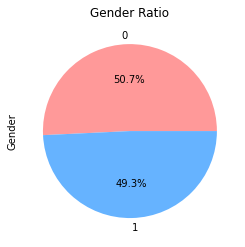

In [71]:
# 0- Female, 1- Male
colors = ['#ff9999','#66b3ff']
ax_worktype2=training_set['Gender'].value_counts().plot(kind='pie', rot=0, title='Gender Ratio', colors = colors,autopct='%1.1f%%')

<AxesSubplot:title={'center':'Histogram of Customer Type'}>

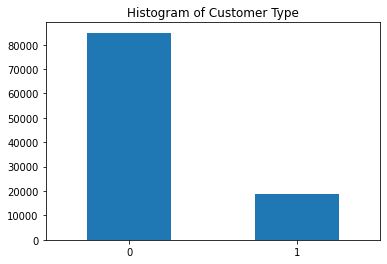

In [72]:
# 0- Loyal Customer, 1- Disloyal Customer
training_set['Customer Type'].value_counts().plot(kind='bar', rot=0, title='Histogram of Customer Type')

Text(0.5, 0, 'Age')

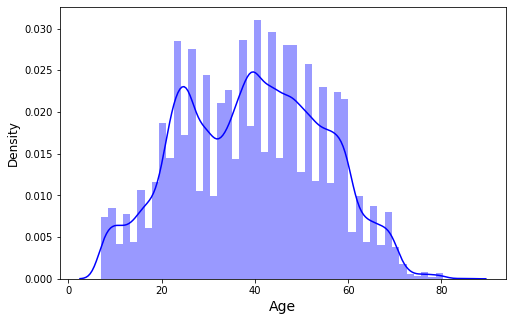

In [73]:
plt.figure(figsize = (8, 5))
age_hist = sns.distplot(training_set['Age'], color = 'blue')
plt.ylabel('Density', size = 12)
plt.xlabel('Age', size = 14)

<AxesSubplot:title={'center':'Histogram of Type of Travel'}>

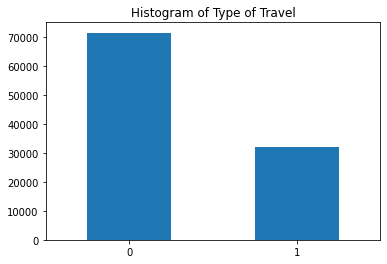

In [74]:
# 0- Business Travel, 1- Personal Travel
training_set['Type of Travel'].value_counts().plot(kind='bar', rot=0, title='Histogram of Type of Travel')

<AxesSubplot:title={'center':'Histogram of Class'}>

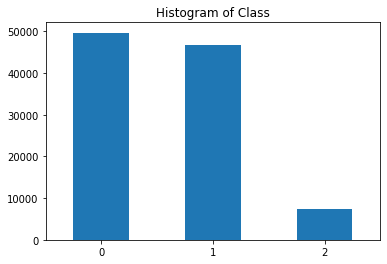

In [75]:
# 0- Business, 1- Eco, 2- Eco Plus
# People travel more via Eco rather than Eco Plus
training_set['Class'].value_counts().plot(kind='bar', rot=0, title='Histogram of Class')

People are more neutral/dissatisfied than satisfied with the airline


<AxesSubplot:title={'center':'Histogram of Satisfaction'}>

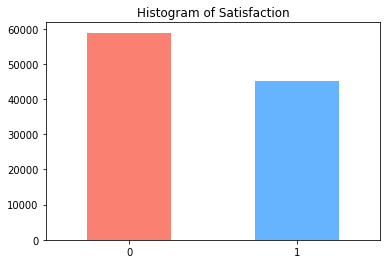

In [76]:
# 0- neutral/dissatisfied, 1- satisfied
print('People are more neutral/dissatisfied than satisfied with the airline')
training_set['satisfaction'].value_counts().plot(kind='bar', rot=0, title='Histogram of Satisfaction', color = ['salmon','#66b3ff'])

In [77]:
print('How many people satisfacted by Airline service: ')
training_set.groupby('Gender')[['satisfaction']].sum()


How many people satisfacted by Airline service: 


,satisfaction
Gender,
0,22534
1,22491


In [78]:
print('Percentage of satisfacted people : ')
training_set.groupby('Gender')[['satisfaction']].sum()/ training_set.groupby('Gender')[['satisfaction']].count()

Percentage of satisfacted people : 


,satisfaction
Gender,
0,0.427371
1,0.439475


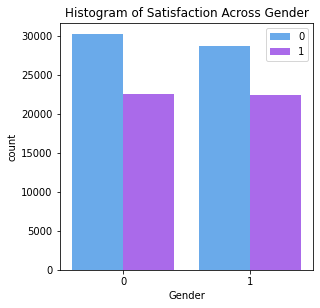

In [79]:
# 0- Female, 1 - Male,  0- Dissatisfaction, 1-satisfaction
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.countplot(data = training_set, x="Gender" , hue="satisfaction", palette="cool")
plt.title("Histogram of Satisfaction Across Gender")
plt.legend()

In [80]:
# 0- Business, 1- Eco, 2- Eco Plus 
print('Satisfaction of people depending on the class: ')
training_set.groupby('Class')[['satisfaction']].sum()

Satisfaction of people depending on the class: 


,satisfaction
Class,
0,34480
1,8701
2,1844


In [81]:
# 0- Business, 1- Eco, 2- Eco Plus
print('Number of people for each class:')
training_set.groupby('Class')[['satisfaction']].count()

Number of people for each class:


,satisfaction
Class,
0,49665
1,46745
2,7494


In [82]:
# 0- Business, 1- Eco, 2- Eco Plus
print('Percentage of satisfacted people depending from the class:')
training_set.groupby('Class')[['satisfaction']].sum()/ training_set.groupby('Class')[['satisfaction']].count()

Percentage of satisfacted people depending from the class:


,satisfaction
Class,
0,0.694251
1,0.186138
2,0.246064


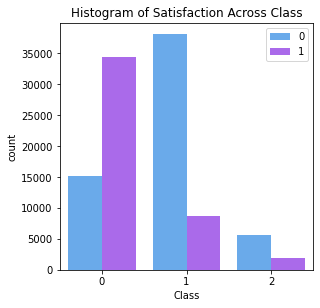

In [83]:
# 0- Business, 1 - Eco, 2- Eco Plus
plt.figure(figsize = (10,10))
plt.subplot(2,2,1) #  which creates a single subplot within a grid. As you can see, this command takes three integer arguments—the number of rows, the number of columns, and the index of the plot to be created in this scheme
sns.countplot(data = training_set, x="Class" , hue="satisfaction", palette="cool") # countplot method is used to Show the counts of observations in each categorical bin using bars.
plt.title("Histogram of Satisfaction Across Class")
plt.legend() # legend is an area describing the elements of the graph

In [84]:
# 0-Business Travel, 1- Personal Travel
print('Percentage of satisfacted people depending from the type of travel:')
training_set.groupby('Type of Travel')[['satisfaction']].sum()/ training_set.groupby('Type of Travel')[['satisfaction']].count()

Percentage of satisfacted people depending from the type of travel:


,satisfaction
Type of Travel,
0,0.582597
1,0.101678


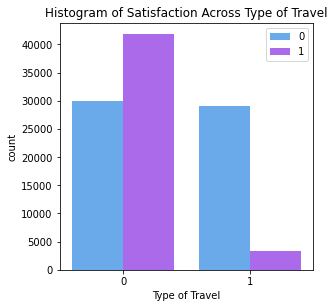

In [85]:
# 0-Business Travel, 1- Personal Travel
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.countplot(data = training_set, x="Type of Travel" , hue="satisfaction", palette="cool")
plt.title("Histogram of Satisfaction Across Type of Travel")
plt.legend()

In [86]:
print('Percentage of satisfacted people depending from the customer type:')
training_set.groupby('Customer Type')[['satisfaction']].sum()/ training_set.groupby('Type of Travel')[['satisfaction']].count()

Percentage of satisfacted people depending from the customer type:


,satisfaction
Customer Type,
0,0.565669
1,0.139291


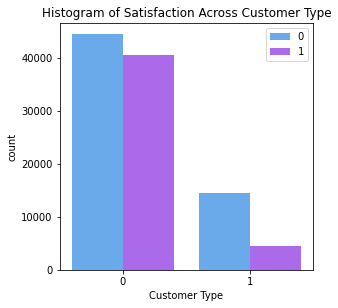

In [87]:
# 0- Loyal Customer, 1- Disloyal customer
plt.figure(figsize = (10,10))
plt.subplot(2,2,1)
sns.countplot(data = training_set, x="Customer Type" , hue="satisfaction", palette="cool")
plt.title("Histogram of Satisfaction Across Customer Type")
plt.legend()

Text(0.5, 0, 'Flight Distance')

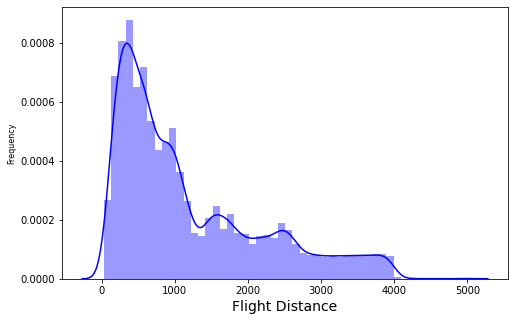

In [88]:
plt.figure(figsize = (8, 5))
fligth_dist_hist = sns.distplot(training_set['Flight Distance'], color = 'blue')
plt.ylabel('Frequency', size = 8)
plt.xlabel('Flight Distance', size = 14)


Text(0.5, 0, 'Departure Delay in Minutes')

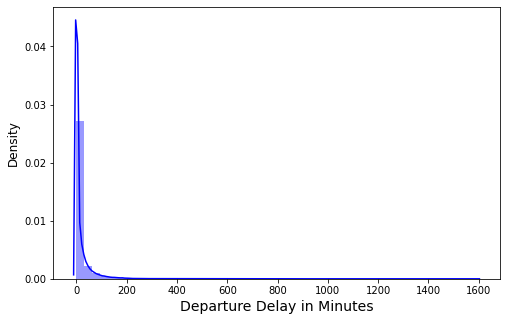

In [89]:
plt.figure(figsize = (8, 5))
fligth_dist_hist = sns.distplot(training_set['Departure Delay in Minutes'], color = 'blue')
plt.ylabel('Density', size = 12)
plt.xlabel('Departure Delay in Minutes', size = 14)

Text(0.5, 0, 'Arrival Delay in Minutes')

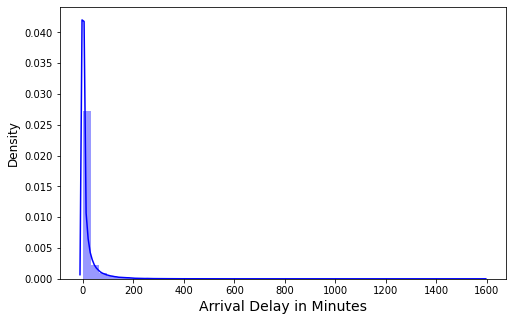

In [90]:
plt.figure(figsize = (8, 5))
fligth_dist_hist = sns.distplot(training_set['Arrival Delay in Minutes'], color = 'blue')
plt.ylabel('Density', size = 12)
plt.xlabel('Arrival Delay in Minutes', size = 14)

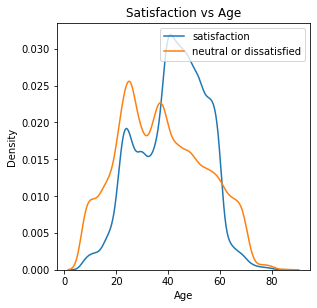

In [91]:
# kdeplot method for visualizing the distribution of observations in a dataset,
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.kdeplot(training_set.loc[training_set["satisfaction"]==1]["Age"],alpha=0.5,label="satisfaction")
sns.kdeplot(training_set.loc[training_set["satisfaction"]==0]["Age"],alpha=0.5,label="neutral or dissatisfied")
plt.title("Satisfaction vs Age")
plt.legend()

Text(0.5, 0, 'Age')

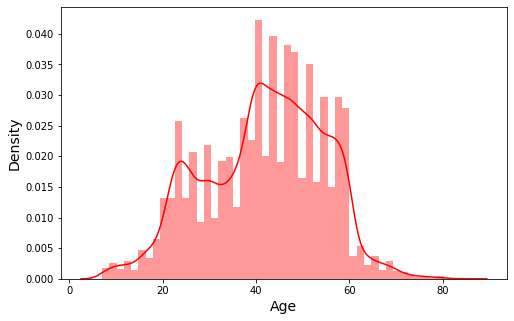

In [92]:
plt.figure(figsize=(8, 5))
age_satisfaction = sns.distplot(training_set[training_set['satisfaction']==1]['Age'],color='red')
plt.ylabel('Density',size=14)
plt.xlabel('Age',size=14)

In [93]:
def bar_plot(variable):
  var = training_set[variable]
  var_value= var.value_counts()

  plt.figure(figsize= (9,3))
  plt.bar(var_value.index, var_value.values)
  
  plt.xlabel("Passengers score")
  plt.ylabel("Frequency")
  plt.title(variable)
  plt.show() 

  print("{}: \n {}".format(variable,var_value))

In [94]:
category1 = [ "Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling", "Checkin service", "Inflight service", "Cleanliness",]

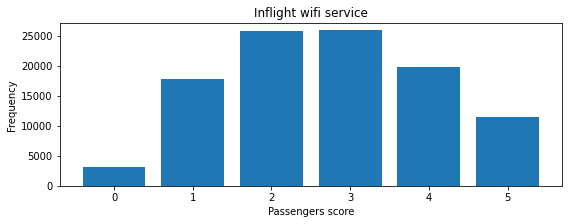

Inflight wifi service: 
 3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: Inflight wifi service, dtype: int64


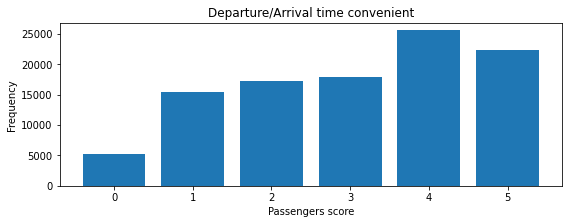

Departure/Arrival time convenient: 
 4    25546
5    22403
3    17966
2    17191
1    15498
0     5300
Name: Departure/Arrival time convenient, dtype: int64


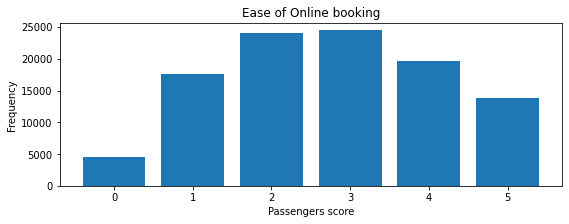

Ease of Online booking: 
 3    24449
2    24021
4    19571
1    17525
5    13851
0     4487
Name: Ease of Online booking, dtype: int64


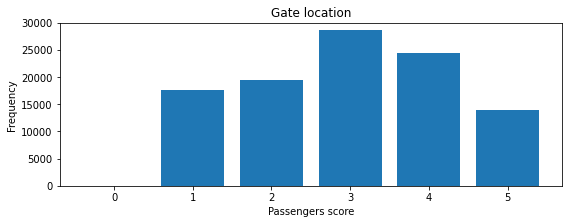

Gate location: 
 3    28577
4    24426
2    19459
1    17562
5    13879
0        1
Name: Gate location, dtype: int64


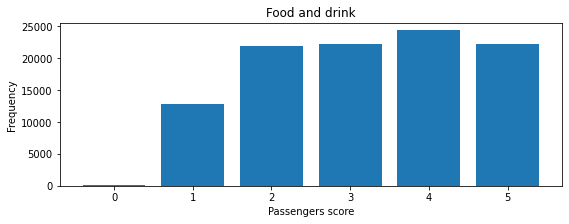

Food and drink: 
 4    24359
5    22313
3    22300
2    21988
1    12837
0      107
Name: Food and drink, dtype: int64


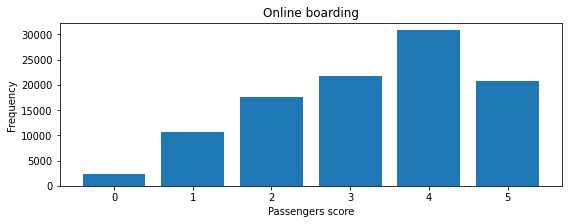

Online boarding: 
 4    30762
3    21804
5    20713
2    17505
1    10692
0     2428
Name: Online boarding, dtype: int64


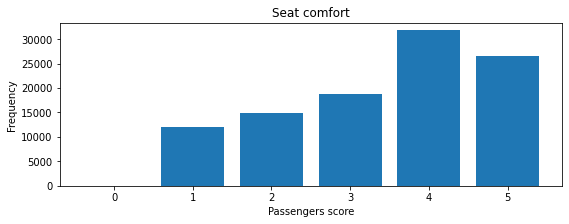

Seat comfort: 
 4    31765
5    26470
3    18696
2    14897
1    12075
0        1
Name: Seat comfort, dtype: int64


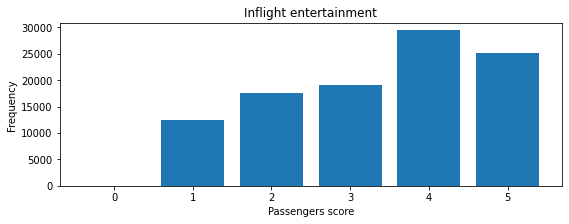

Inflight entertainment: 
 4    29423
5    25213
3    19139
2    17637
1    12478
0       14
Name: Inflight entertainment, dtype: int64


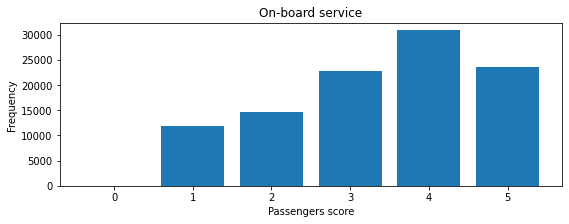

On-board service: 
 4    30867
5    23648
3    22833
2    14681
1    11872
0        3
Name: On-board service, dtype: int64


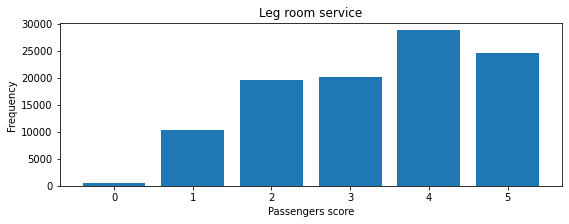

Leg room service: 
 4    28789
5    24667
3    20098
2    19525
1    10353
0      472
Name: Leg room service, dtype: int64


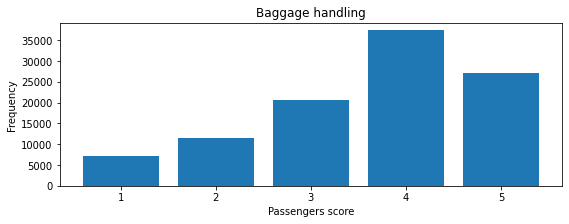

Baggage handling: 
 4    37383
5    27131
3    20632
2    11521
1     7237
Name: Baggage handling, dtype: int64


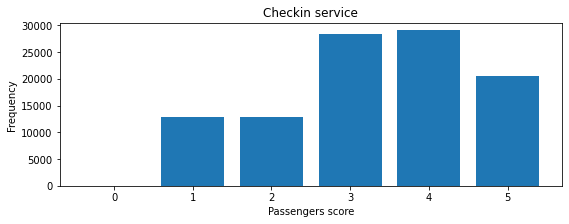

Checkin service: 
 4    29055
3    28446
5    20619
2    12893
1    12890
0        1
Name: Checkin service, dtype: int64


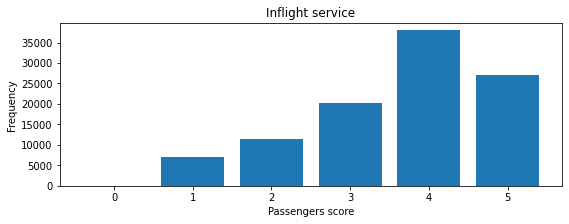

Inflight service: 
 4    37945
5    27116
3    20299
2    11457
1     7084
0        3
Name: Inflight service, dtype: int64


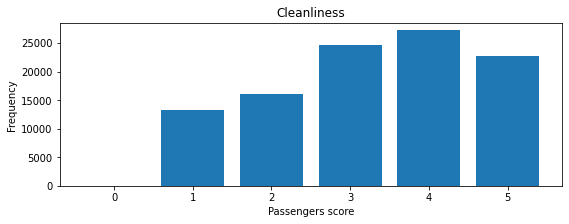

Cleanliness: 
 4    27179
3    24574
5    22689
2    16132
1    13318
0       12
Name: Cleanliness, dtype: int64


In [95]:
for name in category1:
  bar_plot(name)

In [96]:
def bar_plot(variable):
  var = training_set[variable]
  var_value= var.value_counts()
  sns.countplot(data=training_set, x= training_set[variable] , hue="satisfaction", palette="cool")
  
  plt.xlabel("Passengers score")
  plt.ylabel("Frequency")
  plt.title(variable)
  plt.show() 

  print("{}: \n {}".format(variable,var_value))

In [97]:
category1 = [ "Inflight wifi service", "Departure/Arrival time convenient", "Ease of Online booking", "Gate location", "Food and drink", "Online boarding", "Seat comfort", "Inflight entertainment", "On-board service", "Leg room service", "Baggage handling", "Checkin service", "Inflight service", "Cleanliness", "Arrival Delay in Minutes", "Departure Delay in Minutes", "Flight Distance"]

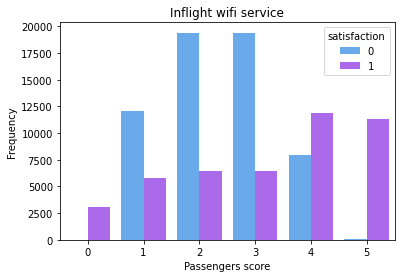

Inflight wifi service: 
 3    25868
2    25830
4    19794
1    17840
5    11469
0     3103
Name: Inflight wifi service, dtype: int64


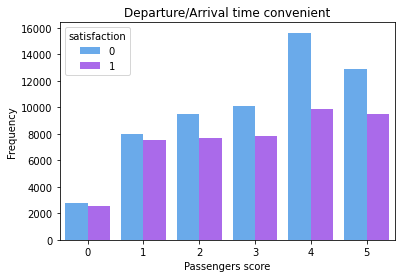

Departure/Arrival time convenient: 
 4    25546
5    22403
3    17966
2    17191
1    15498
0     5300
Name: Departure/Arrival time convenient, dtype: int64


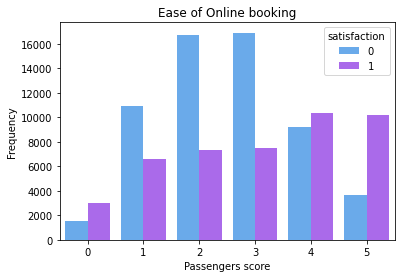

Ease of Online booking: 
 3    24449
2    24021
4    19571
1    17525
5    13851
0     4487
Name: Ease of Online booking, dtype: int64


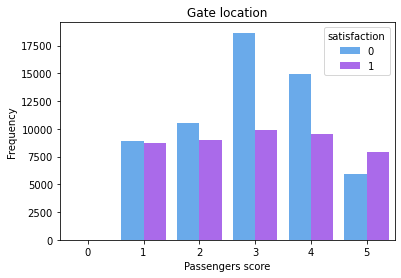

Gate location: 
 3    28577
4    24426
2    19459
1    17562
5    13879
0        1
Name: Gate location, dtype: int64


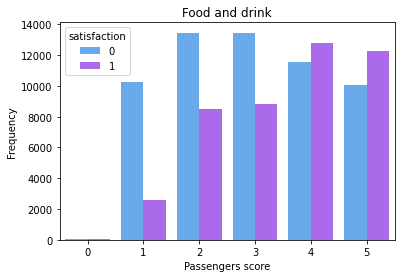

Food and drink: 
 4    24359
5    22313
3    22300
2    21988
1    12837
0      107
Name: Food and drink, dtype: int64


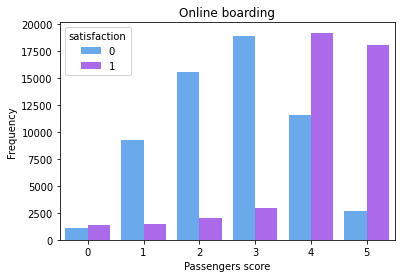

Online boarding: 
 4    30762
3    21804
5    20713
2    17505
1    10692
0     2428
Name: Online boarding, dtype: int64


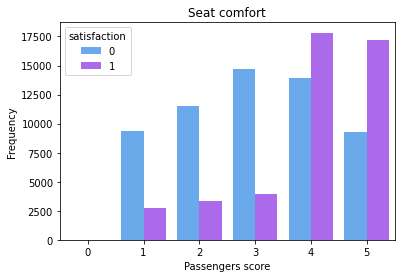

Seat comfort: 
 4    31765
5    26470
3    18696
2    14897
1    12075
0        1
Name: Seat comfort, dtype: int64


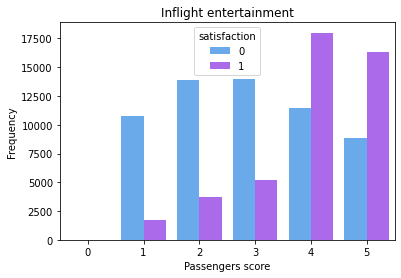

Inflight entertainment: 
 4    29423
5    25213
3    19139
2    17637
1    12478
0       14
Name: Inflight entertainment, dtype: int64


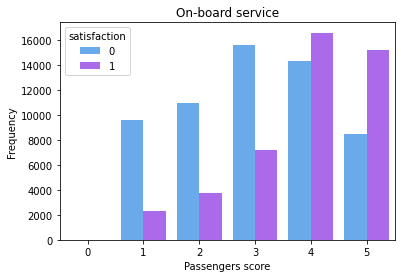

On-board service: 
 4    30867
5    23648
3    22833
2    14681
1    11872
0        3
Name: On-board service, dtype: int64


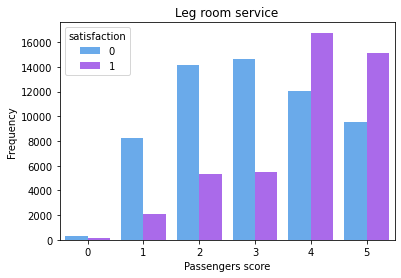

Leg room service: 
 4    28789
5    24667
3    20098
2    19525
1    10353
0      472
Name: Leg room service, dtype: int64


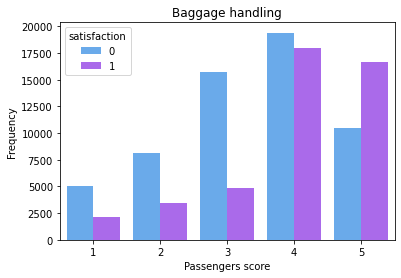

Baggage handling: 
 4    37383
5    27131
3    20632
2    11521
1     7237
Name: Baggage handling, dtype: int64


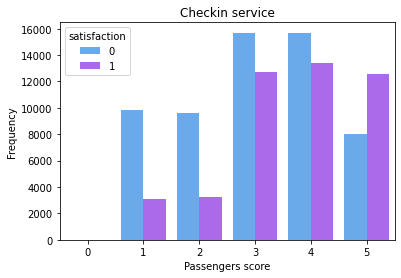

Checkin service: 
 4    29055
3    28446
5    20619
2    12893
1    12890
0        1
Name: Checkin service, dtype: int64


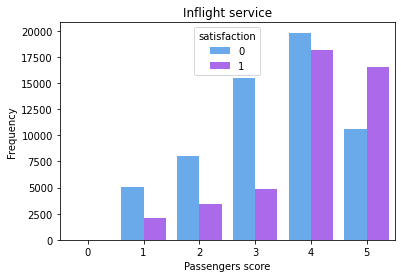

Inflight service: 
 4    37945
5    27116
3    20299
2    11457
1     7084
0        3
Name: Inflight service, dtype: int64


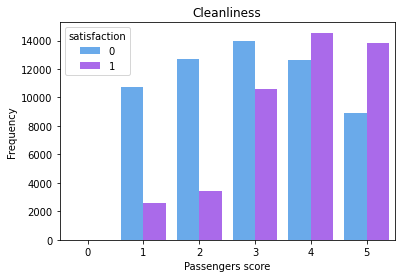

Cleanliness: 
 4    27179
3    24574
5    22689
2    16132
1    13318
0       12
Name: Cleanliness, dtype: int64


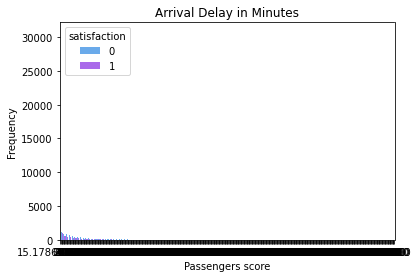

Arrival Delay in Minutes: 
 0.0      58159
1.0       2211
2.0       2064
3.0       1952
4.0       1907
         ...  
369.0        1
339.0        1
389.0        1
356.0        1
484.0        1
Name: Arrival Delay in Minutes, Length: 456, dtype: int64


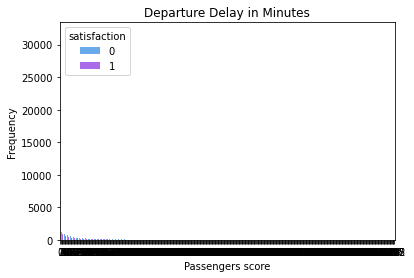

Departure Delay in Minutes: 
 0      58668
1       2948
2       2274
3       2009
4       1854
       ...  
469        1
853        1
429        1
278        1
447        1
Name: Departure Delay in Minutes, Length: 446, dtype: int64


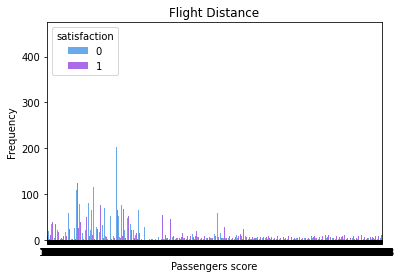

Flight Distance: 
 337     660
594     395
404     392
2475    369
862     369
       ... 
1232      1
1116      1
988       1
1270      1
709       1
Name: Flight Distance, Length: 3802, dtype: int64


In [98]:
for name in category1:
  bar_plot(name)

<AxesSubplot:>

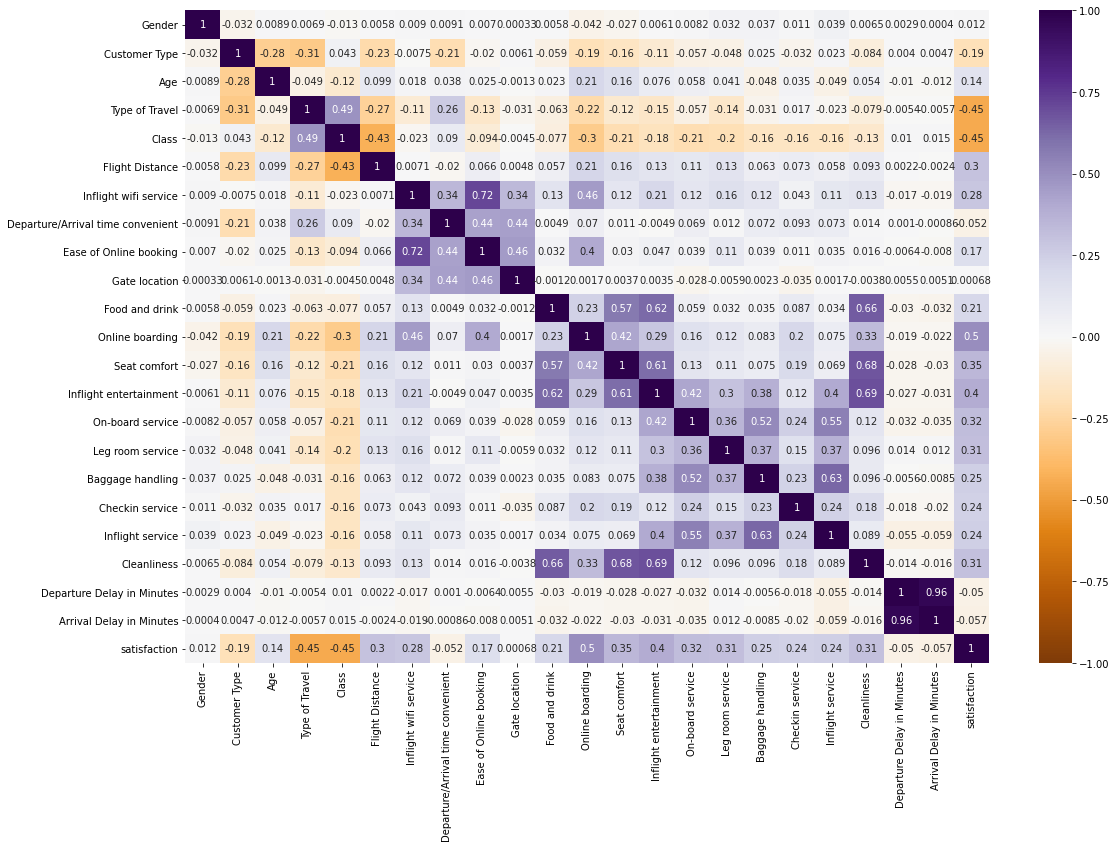

In [99]:
#Plotting the correlation coefficients of all the Features
#training_set.corr() - Pearson Correlation Coefficients
plt.figure(figsize=(18,12))
sns.heatmap(training_set.corr(),vmin=-1, vmax=1, annot=True,cmap='PuOr')

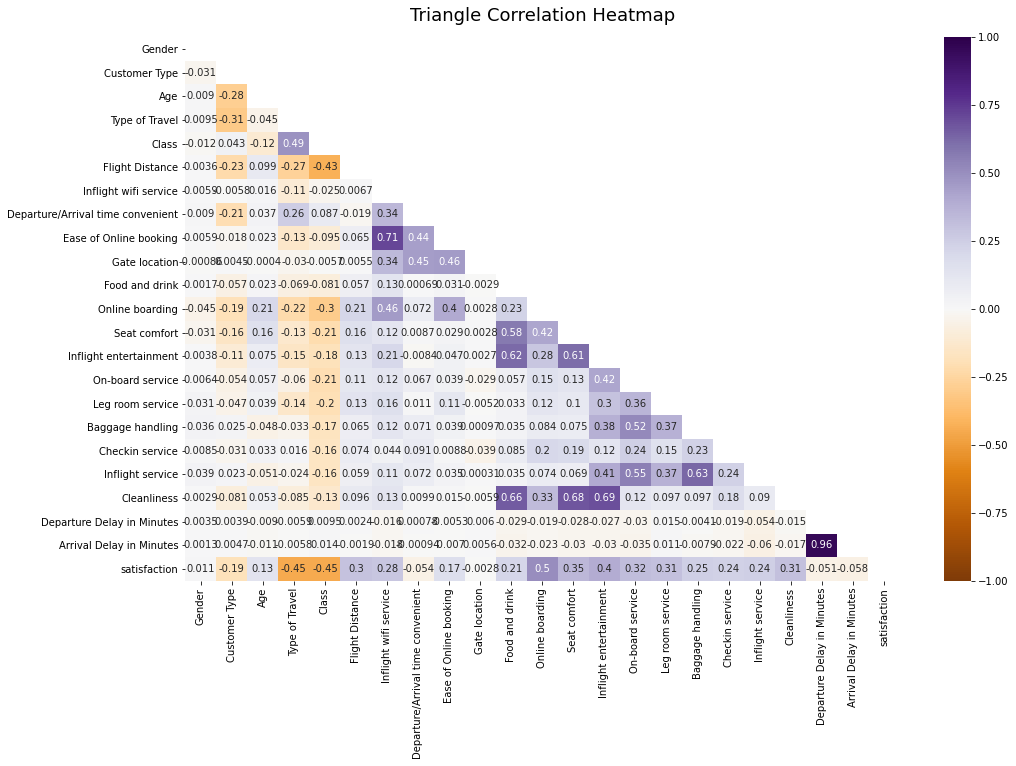

In [100]:
plt.figure(figsize=(16,10))
# define the mask to set the values in the upper triangle to True
mask = np.triu(np.ones_like(dataset.corr(), dtype=np.bool))
heatmap = sns.heatmap(dataset.corr(), mask=mask, vmin=-1, vmax=1, annot=True, cmap='PuOr')
heatmap.set_title('Triangle Correlation Heatmap', fontdict={'fontsize':18}, pad=16);

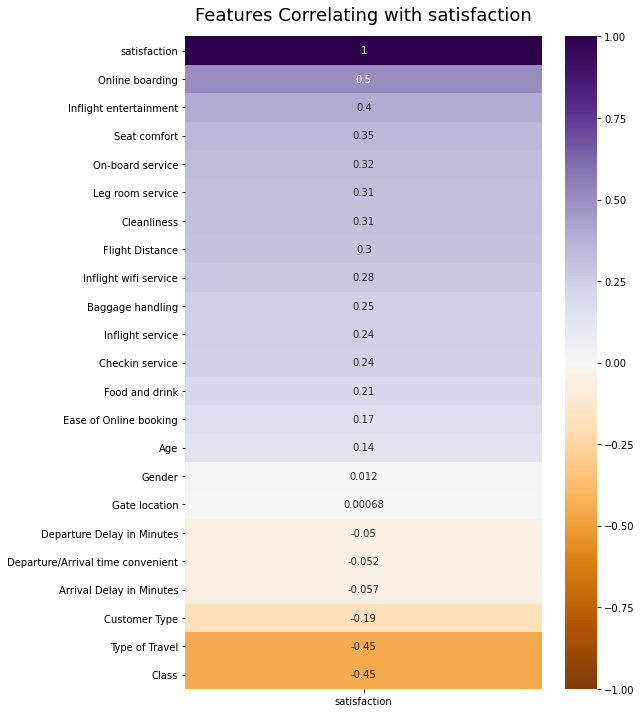

In [101]:
plt.figure(figsize=(8, 12))
heatmap = sns.heatmap(training_set.corr()[['satisfaction']].sort_values(by='satisfaction', ascending=False), vmin=-1, vmax=1, annot=True, cmap='PuOr')
heatmap.set_title('Features Correlating with satisfaction', fontdict={'fontsize':18}, pad=16);

In [102]:
X_train.shape, y_train.shape

((103904, 22), (103904, 1))

In [103]:
X_test.shape, y_test.shape

((25976, 22), (25976, 1))

**Build the Classification Algorithms**

In [104]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, roc_auc_score
model = RandomForestClassifier()
model.fit(X_train, y_train)
pred = model.predict(X_test)
roc_auc = roc_auc_score(y_test, pred)
print("ROC_AUC = {}".format(roc_auc))
print('Accuracy: ', accuracy_score(y_test, pred))

ROC_AUC = 0.9612209546438555
Accuracy:  0.9634662765629812


In [105]:
from sklearn.metrics import classification_report, f1_score
print(classification_report(y_test, pred, digits=5))


              precision    recall  f1-score   support

           0    0.95632   0.97962   0.96783     14573
           1    0.97312   0.94282   0.95773     11403

    accuracy                        0.96347     25976
   macro avg    0.96472   0.96122   0.96278     25976
weighted avg    0.96370   0.96347   0.96340     25976



In [106]:
f1_score(y_test,pred,average='weighted')

0.963397251154764

In [127]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, plot_confusion_matrix,confusion_matrix


def classAlg(model):
    model.fit(X_train,y_train)

    prediction_test = model.predict(X_test)
    prediction_train = model.predict(X_train)

    print('Classification Data Test')
    print(classification_report(y_test,prediction_test, digits=5))
    roc_auc = roc_auc_score(y_test, prediction_test)
    print("ROC_AUC = {}".format(roc_auc))
    print('========================================================')
    print('Classification Data Train')
    print(classification_report(y_train,prediction_train, digits=5))
    roc_auc = roc_auc_score(y_train, prediction_train)
    print("ROC_AUC = {}".format(roc_auc))
    


In [128]:
model = RandomForestClassifier()
classAlg(model) 

Classification Data Test
              precision    recall  f1-score   support

           0    0.95566   0.98065   0.96800     14573
           1    0.97441   0.94186   0.95786     11403

    accuracy                        0.96362     25976
   macro avg    0.96504   0.96125   0.96293     25976
weighted avg    0.96390   0.96362   0.96355     25976

ROC_AUC = 0.9612532758130858
Classification Data Train
              precision    recall  f1-score   support

           0    0.99998   1.00000   0.99999     58879
           1    1.00000   0.99998   0.99999     45025

    accuracy                        0.99999    103904
   macro avg    0.99999   0.99999   0.99999    103904
weighted avg    0.99999   0.99999   0.99999    103904

ROC_AUC = 0.9999888950583009


In [131]:
model = LogisticRegression()
classAlg(model) 

Classification Data Test
              precision    recall  f1-score   support

           0    0.85107   0.81994   0.83521     14573
           1    0.78016   0.81663   0.79798     11403

    accuracy                        0.81849     25976
   macro avg    0.81561   0.81828   0.81660     25976
weighted avg    0.81994   0.81849   0.81887     25976

ROC_AUC = 0.8182840950619326
Classification Data Train
              precision    recall  f1-score   support

           0    0.85243   0.82135   0.83660     58879
           1    0.77701   0.81406   0.79510     45025

    accuracy                        0.81819    103904
   macro avg    0.81472   0.81770   0.81585    103904
weighted avg    0.81975   0.81819   0.81862    103904

ROC_AUC = 0.8177021637058219


In [130]:
model = DecisionTreeClassifier()
classAlg(model) 

Classification Data Test
              precision    recall  f1-score   support

           0    0.95411   0.95169   0.95290     14573
           1    0.93846   0.94151   0.93998     11403

    accuracy                        0.94722     25976
   macro avg    0.94629   0.94660   0.94644     25976
weighted avg    0.94724   0.94722   0.94723     25976

ROC_AUC = 0.9465990526581652
Classification Data Train
              precision    recall  f1-score   support

           0    1.00000   1.00000   1.00000     58879
           1    1.00000   1.00000   1.00000     45025

    accuracy                        1.00000    103904
   macro avg    1.00000   1.00000   1.00000    103904
weighted avg    1.00000   1.00000   1.00000    103904

ROC_AUC = 1.0


In [132]:
model = GradientBoostingClassifier()
classAlg(model) 

Classification Data Test
              precision    recall  f1-score   support

           0    0.93891   0.95862   0.94866     14573
           1    0.94566   0.92028   0.93280     11403

    accuracy                        0.94179     25976
   macro avg    0.94228   0.93945   0.94073     25976
weighted avg    0.94187   0.94179   0.94170     25976

ROC_AUC = 0.9394531225670549
Classification Data Train
              precision    recall  f1-score   support

           0    0.93937   0.95866   0.94892     58879
           1    0.94445   0.91909   0.93160     45025

    accuracy                        0.94151    103904
   macro avg    0.94191   0.93888   0.94026    103904
weighted avg    0.94157   0.94151   0.94141    103904

ROC_AUC = 0.9388751887369989
